Visualizations

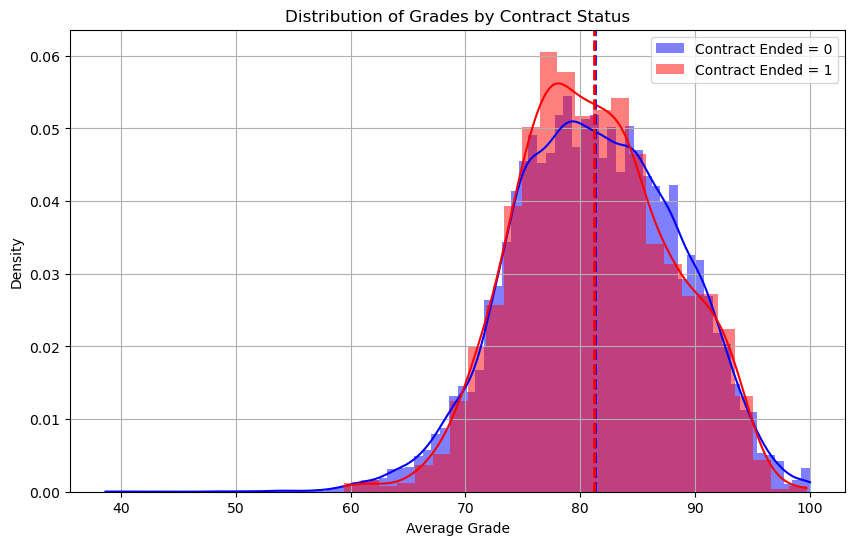

In [6]:
# Avrerage Treat Effect (ATE) with grades that have professors that are on the last year of their contract.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/Alltogetherall.csv")

# Filtering the data based on ContractEnded status and calculating average grades
contract_ended_0 = data[data['ContractEnded'] == 0]['Avg']
contract_ended_1 = data[data['ContractEnded'] == 1]['Avg']

# Calculating averages for each group
avg_grade_0 = contract_ended_0.mean()
avg_grade_1 = contract_ended_1.mean()

# Plotting the distribution of grades for both groups
plt.figure(figsize=(10, 6))
sns.histplot(contract_ended_0, color="blue", label="Contract Ended = 0", kde=True, stat="density", linewidth=0)
sns.histplot(contract_ended_1, color="red", label="Contract Ended = 1", kde=True, stat="density", linewidth=0)

# Adding lines for the average
plt.axvline(avg_grade_0, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(avg_grade_1, color='red', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.title('Distribution of Grades by Contract Status')
plt.xlabel('Average Grade')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



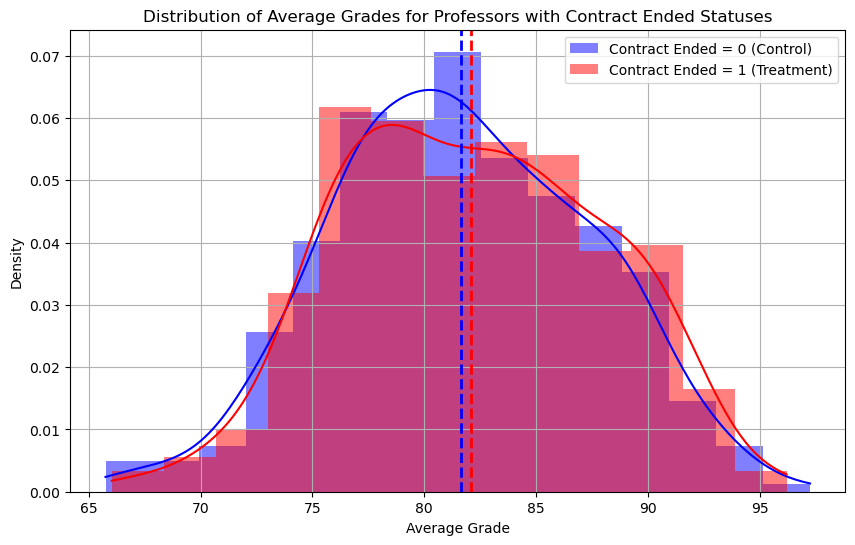

In [8]:
# Here I control for professors so this is the Average Treatment Effect on the Treated (ATT) 

professors_with_both_statuses = data[data['Professor'].isin(data[data['ContractEnded'] == 0]['Professor']) & 
                                     data['Professor'].isin(data[data['ContractEnded'] == 1]['Professor'])]

# Grouping data by Professor and ContractEnded status to calculate average grades
average_grades_by_professor_and_status = professors_with_both_statuses.groupby(['Professor', 'ContractEnded'])['Avg'].mean().unstack()

# Creating a dataset for average grades of professors when ContractEnded is 0 and 1
avg_grades_0 = average_grades_by_professor_and_status[0]
avg_grades_1 = average_grades_by_professor_and_status[1]

# Plotting the distribution of average grades for both ContractEnded statuses
plt.figure(figsize=(10, 6))
sns.histplot(avg_grades_0, color="blue", label="Contract Ended = 0 (Control)", kde=True, stat="density", linewidth=0)
sns.histplot(avg_grades_1, color="red", label="Contract Ended = 1 (Treatment)", kde=True, stat="density", linewidth=0)

# Adding lines for the average of each group
plt.axvline(avg_grades_0.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(avg_grades_1.mean(), color='red', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.title('Distribution of Average Grades for Professors with Contract Ended Statuses')
plt.xlabel('Average Grade')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()




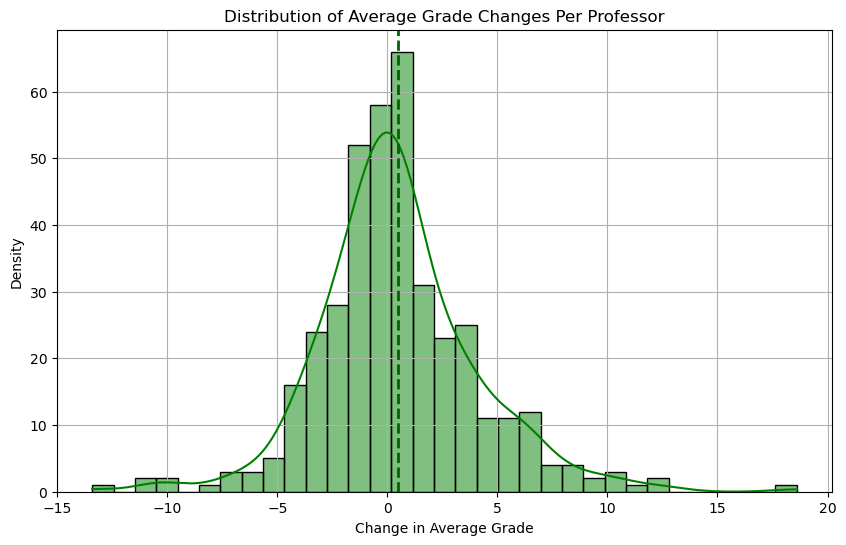

In [10]:
# Average Change 
# Calculating the change in average grade for each professor
average_grades_by_professor_and_status['Avg_Change'] = average_grades_by_professor_and_status[1] - average_grades_by_professor_and_status[0]

# Extracting the change in average grade for each professor
avg_grade_changes = average_grades_by_professor_and_status['Avg_Change']

# Plotting the distribution of average grade changes
plt.figure(figsize=(10, 6))
sns.histplot(avg_grade_changes, color="green", kde=True)

# Adding line for the overall average change
plt.axvline(avg_grade_changes.mean(), color='darkgreen', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.title('Distribution of Average Grade Changes Per Professor')
plt.xlabel('Change in Average Grade')
plt.ylabel('Density')
plt.grid(True)
plt.show()



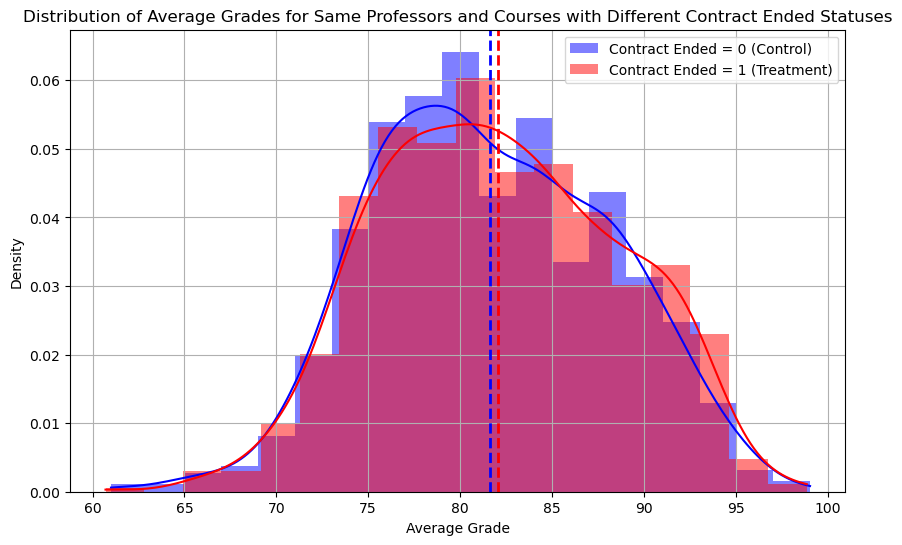

In [11]:
# ATT including classes, this includes individual class changes 

# Filtering data for professors who have both ContractEnded = 0 and ContractEnded = 1, and taught the same class
professors_with_both_statuses_same_class = data[data.duplicated(subset=['Professor', 'Course'], keep=False)]
professors_with_both_statuses_same_class = professors_with_both_statuses_same_class[
    professors_with_both_statuses_same_class['Professor'].isin(professors_with_both_statuses_same_class[professors_with_both_statuses_same_class['ContractEnded'] == 0]['Professor']) &
    professors_with_both_statuses_same_class['Professor'].isin(professors_with_both_statuses_same_class[professors_with_both_statuses_same_class['ContractEnded'] == 1]['Professor'])
]

# Grouping data by Professor, Course, and ContractEnded status to calculate average grades
average_grades_by_professor_course_and_status = professors_with_both_statuses_same_class.groupby(['Professor', 'Course', 'ContractEnded'])['Avg'].mean().unstack()

# Creating datasets for average grades of professors for the same courses when ContractEnded is 0 and 1
avg_grades_same_class_0 = average_grades_by_professor_course_and_status[0]
avg_grades_same_class_1 = average_grades_by_professor_course_and_status[1]

# Plotting the distribution of average grades for both ContractEnded statuses in the same classes
plt.figure(figsize=(10, 6))
sns.histplot(avg_grades_same_class_0, color="blue", label="Contract Ended = 0 (Control)", kde=True, stat="density", linewidth=0)
sns.histplot(avg_grades_same_class_1, color="red", label="Contract Ended = 1 (Treatment)", kde=True, stat="density", linewidth=0)

# Adding lines for the average of each group
plt.axvline(avg_grades_same_class_0.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(avg_grades_same_class_1.mean(), color='red', linestyle='dashed', linewidth=2)

# Adding labels and title
plt.title('Distribution of Average Grades for Same Professors and Courses with Different Contract Ended Statuses')
plt.xlabel('Average Grade')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



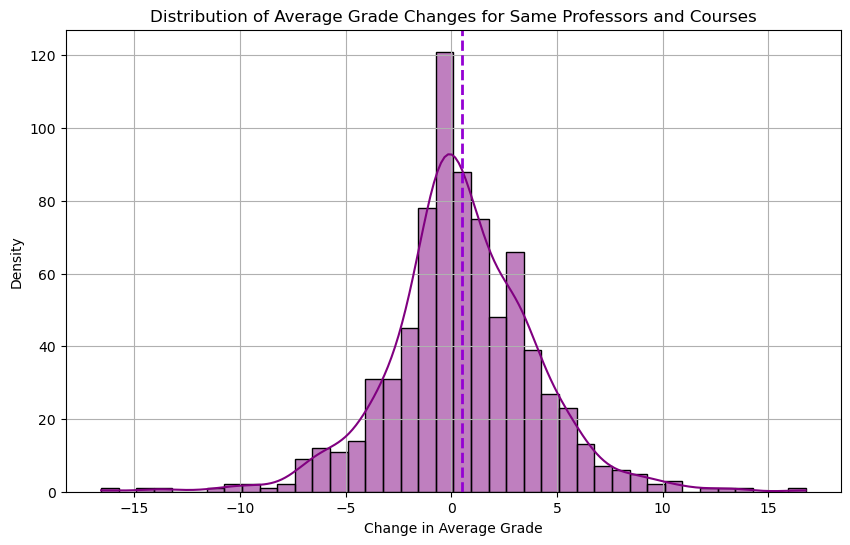

In [15]:
# Average change

# Calculating the change in average grade for each professor for the same courses
average_grades_by_professor_course_and_status['Avg_Grade_Change'] = average_grades_by_professor_course_and_status[1] - average_grades_by_professor_course_and_status[0]

# Creating datasets for average grades of professors for the same courses when ContractEnded is 0 and 1
avg_grades_same_class_0 = average_grades_by_professor_course_and_status[0]
avg_grades_same_class_1 = average_grades_by_professor_course_and_status[1]



# Extracting and plotting the change in average grade for each professor for the same courses
avg_grade_changes_same_class = average_grades_by_professor_course_and_status['Avg_Grade_Change'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(avg_grade_changes_same_class, color="purple", kde=True)
plt.axvline(avg_grade_changes_same_class.mean(), color='darkviolet', linestyle='dashed', linewidth=2)

plt.title('Distribution of Average Grade Changes for Same Professors and Courses')
plt.xlabel('Change in Average Grade')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
g = gr.Digraph()
g.edge('Professor Contract Status', 'Class Average', style = 'dashed')
g.edge('Professor', 'Professor Contract Status')
g.edge('Professor', 'Class Average')
g.edge('Class', 'Class Average')
g.edge('Class', 'Number of Students Enrolled')
g.edge('Number of Students Enrolled', 'Class Average')
g.edge('Unobserved Variables', 'Class Average')


g.node('Professor Contract Status', style='filled')
g.node('Professor', style='filled')
g.node('Class', style='filled')
g.node('Number of Students Enrolled', style='filled')


# Display the graph
g


# Specify the file path where you want to save the image
file_path = r'C:\Users\Guill\Downloads\6'

# Save the DAG as a PNG image in the specified directory
g.render(file_path, format='png', cleanup=True)